In [1]:
'''
Código criado por Júlia Nogueira em 24/10/2021
Atualizado pela última vez em 24/10/2021

Objetivo: Aplicação de Gradient Boosting a um problema de classificação:
Detecção e diagnóstico de falhas em uma unidade de águas ácidas.

Utiliza os dados do trabalho: 
"FAULT DETECTION AND DIAGNOSIS OF A TWO-COLUMN SOUR WATER TREATMENT UNIT BASED ON ARTIFICIAL INTELLIGENCE
ALGORITHMS"

'''

'\nCódigo criado por Júlia Nogueira em 24/10/2021\nAtualizado pela última vez em 24/10/2021\n\nObjetivo: Aplicação de Gradient Boosting a um problema de classificação:\nDetecção e diagnóstico de falhas em uma unidade de águas ácidas.\n\nUtiliza os dados do trabalho: \n"FAULT DETECTION AND DIAGNOSIS OF A TWO-COLUMN SOUR WATER TREATMENT UNIT BASED ON ARTIFICIAL INTELLIGENCE\nALGORITHMS"\n\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
# import joblib

import sklearn.model_selection
import sklearn.metrics

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score

# import sys
# import time

In [3]:
'''# Começa a contar o tempo de processamento
t = time.time()

# Salva a saída do terminal em um arquivo
f = open("GB_output", 'w')
sys.stdout = f'''

'# Começa a contar o tempo de processamento\nt = time.time()\n\n# Salva a saída do terminal em um arquivo\nf = open("GB_output", \'w\')\nsys.stdout = f'

In [4]:
# Leitura e conversão dos dados em array
dados_train = np.genfromtxt('SWTU_FDD_standardized_train_data.txt', skip_header=1)
print("Formato dos dados de treinamento:", dados_train.shape)

dados_test = np.genfromtxt('SWTU_FDD_standardized_test_data.txt', skip_header=1)
print("Formato dos dados de teste:", dados_test.shape)

# header
with open('SWTU_FDD_standardized_train_data.txt', 'r') as file:
    header = file.readline().strip() # pegando a primeira linha
header = header.split()
print('Header:', header)

Formato dos dados de treinamento: (37519, 27)
Formato dos dados de teste: (22525, 27)
Header: ['ACG1P(t-1)', 'AMG1P(t-1)', 'C1SL(t-1)', 'C2DL(t-1)', 'C2SL(t-1)', 'SW8T(t-1)', 'C1S2T(t-1)', 'AMG1T(t-1)', 'SW1F(t-1)', 'SW5F(t-1)', 'CW5F(t-1)', 'CW8F(t-1)', 'C2HDI(t-1)', 'ACG1P(t)', 'AMG1P(t)', 'C1SL(t)', 'C2DL(t)', 'C2SL(t)', 'SW8T(t)', 'C1S2T(t)', 'AMG1T(t)', 'SW1F(t)', 'SW5F(t)', 'CW5F(t)', 'CW8F(t)', 'C2HDI(t)', 'CLASS']


In [5]:
# Separação das entradas e saídas dos modelos
train_data, train_output = dados_train[:, :-1], dados_train[:, -1]
test_data, test_output = dados_test[:, :-1], dados_test[:, -1]

print("Formato dos dados de entrada de treinamento:", train_data.shape)
print("Formato dos dados de entrada de teste:", test_data.shape)
print("Formato dos dados de saída de treinamento:", train_output.shape)
print("Formato dos dados de saída teste:", test_output.shape)

Formato dos dados de entrada de treinamento: (37519, 26)
Formato dos dados de entrada de teste: (22525, 26)
Formato dos dados de saída de treinamento: (37519,)
Formato dos dados de saída teste: (22525,)


In [6]:
# Otimização de Hiperparâmetros
def objetivo_rc(trial):
    # Hiperparâmetros de busca para GB
    gb_min_samples_leaf = trial.suggest_int("gb_min_samples_leaf", 1, 10)
    gb_max_depth = trial.suggest_int("gb_max_depth", 5, 10, log = True)
    gb_n_estimators = trial.suggest_int("gb_n_estimators", 1, 100)

    # Criação do modelo GB
    m = sklearn.ensemble.GradientBoostingClassifier(max_depth = gb_max_depth, 
    min_samples_leaf = gb_min_samples_leaf, n_estimators = gb_n_estimators)

    # Retornando acurácia
    acuracias = sklearn.model_selection.cross_val_score(m, train_data, train_output)
    acuracia = acuracias.mean()

    return acuracia

# Resultados função objetivo
study_rc = optuna.create_study(direction="maximize")
n_trials = 10
print("Nº Iterações Otimização:", n_trials)
study_rc.optimize(objetivo_rc, n_trials=n_trials)
print("Hiperparâmetros Otimizados:", study_rc.best_params)

[I 2021-10-24 11:58:39,824] A new study created in memory with name: no-name-3d4bc072-309a-4628-838a-bc7c6d7dc444


Nº Iterações Otimização: 10


[I 2021-10-24 12:04:33,783] Trial 0 finished with value: 0.9526373920936246 and parameters: {'gb_min_samples_leaf': 10, 'gb_max_depth': 5, 'gb_n_estimators': 17}. Best is trial 0 with value: 0.9526373920936246.
[I 2021-10-24 12:22:52,499] Trial 1 finished with value: 0.9592473564945024 and parameters: {'gb_min_samples_leaf': 5, 'gb_max_depth': 8, 'gb_n_estimators': 31}. Best is trial 1 with value: 0.9592473564945024.
[I 2021-10-24 13:02:10,628] Trial 2 finished with value: 0.9614329037397124 and parameters: {'gb_min_samples_leaf': 10, 'gb_max_depth': 6, 'gb_n_estimators': 89}. Best is trial 2 with value: 0.9614329037397124.
[I 2021-10-24 13:19:46,907] Trial 3 finished with value: 0.9589542150446146 and parameters: {'gb_min_samples_leaf': 4, 'gb_max_depth': 5, 'gb_n_estimators': 48}. Best is trial 2 with value: 0.9614329037397124.
[I 2021-10-24 13:24:11,152] Trial 4 finished with value: 0.9497055548782619 and parameters: {'gb_min_samples_leaf': 5, 'gb_max_depth': 5, 'gb_n_estimators': 1

Hiperparâmetros Otimizados: {'gb_min_samples_leaf': 10, 'gb_max_depth': 6, 'gb_n_estimators': 89}


In [7]:
# Gráficos otimização de hiperparâmetros
fig1 = optuna.visualization.plot_optimization_history(study_rc)
fig1.show()

fig2 = optuna.visualization.plot_slice(study_rc)
fig2.show()

fig3 = optuna.visualization.plot_parallel_coordinate(study_rc)
fig3.show() 

In [8]:
# Criação, treinamento e teste do modelo GB com hiperparâmetros otimizados
m2 = sklearn.ensemble.GradientBoostingClassifier(max_depth = study_rc.best_params['gb_max_depth'],
min_samples_leaf = study_rc.best_params['gb_min_samples_leaf'],
n_estimators = study_rc.best_params['gb_n_estimators'])

m2.fit(train_data, train_output)  # treinamento
predictions = m2.predict(test_data)  # teste

In [9]:
'''# Célula alternativa a anterior, que salva o modelo em um arquivo joblib

# Criação, treinamento e teste do modelo GB com hiperparâmetros otimizados
m2 = sklearn.ensemble.GradientBoostingClassifier(max_depth = study_rc.best_params['gb_max_depth'],
min_samples_leaf = study_rc.best_params['gb_min_samples_leaf'],
n_estimators = study_rc.best_params['gb_n_estimators'])

m2.fit(train_data, train_output)  # treinamento

joblib.dump(m2, "GB_model.joblib")
loaded_model = joblib.load("GB_model.joblib")
predictions = loaded_model.predict(test_data)  # teste '''

'# Célula alternativa a anterior, que salva o modelo em um arquivo joblib\n\n# Criação, treinamento e teste do modelo GB com hiperparâmetros otimizados\nm2 = sklearn.ensemble.GradientBoostingClassifier(max_depth = study_rc.best_params[\'gb_max_depth\'],\nmin_samples_leaf = study_rc.best_params[\'gb_min_samples_leaf\'],\nn_estimators = study_rc.best_params[\'gb_n_estimators\'])\n\nm2.fit(train_data, train_output)  # treinamento\n\njoblib.dump(m2, "GB_model.joblib")\nloaded_model = joblib.load("GB_model.joblib")\npredictions = loaded_model.predict(test_data)  # teste '

Relatório de classificação:
               precision    recall  f1-score   support

         0.0       0.94      0.98      0.96     14657
         1.0       0.89      0.84      0.87      2742
         2.0       0.98      0.84      0.91      2659
         3.0       0.96      0.92      0.94       663
         4.0       0.97      1.00      0.98       470
         5.0       1.00      0.99      0.99       719
         6.0       0.99      0.91      0.95       615

    accuracy                           0.94     22525
   macro avg       0.96      0.92      0.94     22525
weighted avg       0.94      0.94      0.94     22525

Matriz de confusão:
 [[14293   281    37    25    14     3     4]
 [  426  2316     0     0     0     0     0]
 [  430     0  2229     0     0     0     0]
 [   56     0     0   607     0     0     0]
 [    0     0     0     1   469     0     0]
 [    8     0     0     0     0   711     0]
 [   57     0     0     0     0     0   558]]


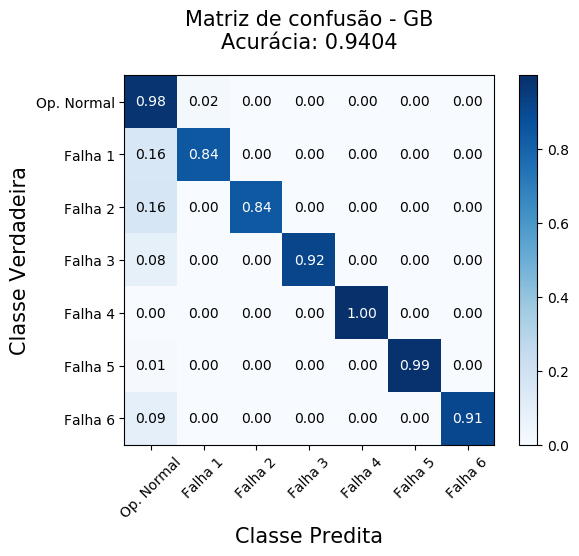

In [10]:
# Matriz de confusão e relatório de classificação
class_report = classification_report(test_output, predictions)
print('Relatório de classificação:\n', class_report)
conf_mat = confusion_matrix(
    test_output, predictions, labels=[0, 1, 2, 3, 4, 5, 6])
print('Matriz de confusão:\n', conf_mat)

# Gráfico matriz de confusão
plt.rcParams.update(plt.rcParamsDefault)
LABELS = ["Op. Normal", "Falha 1", "Falha 2",
          "Falha 3", "Falha 4", "Falha 5", "Falha 6"]
acc = accuracy_score(test_output, predictions)
plot_confusion_matrix(conf_mat=conf_mat, colorbar=True, show_absolute=False,
show_normed=True, class_names=LABELS, cmap=plt.cm.Blues)

plt.title("Matriz de confusão - GB\nAcurácia: %1.4f" % acc, fontsize=15)
plt.ylabel('Classe Verdadeira', fontsize=15)
plt.xlabel('Classe Predita', fontsize=15)
plt.savefig('GB_confmat.png')
plt.show()
plt.close()

Variável: ACG1P(t)             Importância: 0.1757
Variável: SW5F(t)              Importância: 0.1706
Variável: ACG1P(t-1)           Importância: 0.117
Variável: SW1F(t)              Importância: 0.0972
Variável: SW1F(t-1)            Importância: 0.0782
Variável: AMG1P(t-1)           Importância: 0.0765
Variável: C2SL(t-1)            Importância: 0.0732
Variável: SW8T(t)              Importância: 0.0645
Variável: C2SL(t)              Importância: 0.0596
Variável: SW8T(t-1)            Importância: 0.0367
Variável: AMG1T(t-1)           Importância: 0.0075
Variável: AMG1P(t)             Importância: 0.0075
Variável: AMG1T(t)             Importância: 0.0072
Variável: SW5F(t-1)            Importância: 0.005
Variável: CW5F(t)              Importância: 0.0038
Variável: C1S2T(t-1)           Importância: 0.0036
Variável: C1S2T(t)             Importância: 0.0034
Variável: C2DL(t-1)            Importância: 0.0029
Variável: C2DL(t)              Importância: 0.0027
Variável: CW5F(t-1)            Im

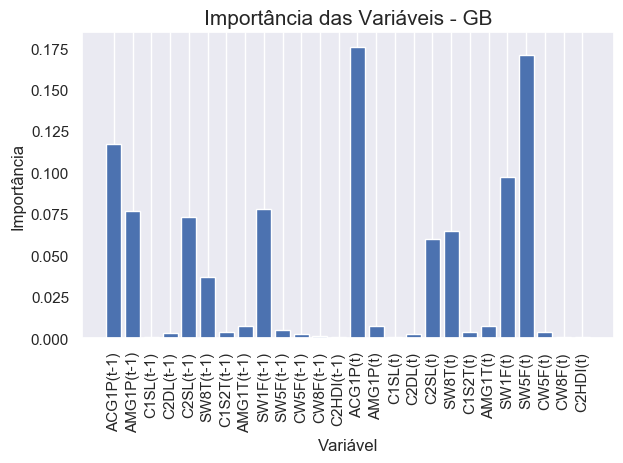

In [11]:
# Importancia das variáveis
importances = list(m2.feature_importances_)
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(header, importances)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)
[print('Variável: {:20} Importância: {}'.format(*pair)) for pair in feature_importances]

# Gráfico importância
sns.set(font_scale=1)
x_values = list(range(len(importances)))
plt.figure()
plt.grid(axis='y')
plt.bar(x_values, importances, orientation='vertical')
plt.xticks(x_values, header, rotation='vertical')
plt.ylabel('Importância')
plt.xlabel('Variável')
plt.title('Importância das Variáveis - GB', fontsize=15)
plt.tight_layout()
plt.savefig('GB_importance.png')
plt.show()
plt.close()

In [12]:
# ----------------- Redução variáveis pela importância -----------------
print("------------------ REDUÇÃO DE VARIÁVEIS -------------------\n")
# Quantidade de variáveis que serão utilizadas na redução
columns = sum(big > 0.02 for big in importances)
# Criando vetor reduzido dados treino
train_data_red = np.zeros((train_data.shape[0], columns))
# Criando vetor reduzido dados teste
test_data_red = np.zeros((test_data.shape[0], columns))
# Criando vetor reduzido header
header_red = []
fix_pos = 0  # Contador dos dados reduzidos
total_importance = 0  # Soma da importância total das variáveis reduzidas
for pos, item in enumerate(importances):
    if item > 0.02:  # Critério para redução
        train_data_red[:, fix_pos] = train_data[:, pos]
        test_data_red[:, fix_pos] = test_data[:, pos]
        header_red.append(header[pos])
        fix_pos = fix_pos + 1
        total_importance = total_importance + item

print("Importância total da versão reduzida:", total_importance)
print("Formato dos dados de entrada de treinamento reduzidos:", train_data_red.shape)
print("Formato dos dados de de entrada de teste reduzidos:", test_data_red.shape)
print("Formato do header reduzido:", len(header_red))
print("Header reduzido:", header_red)

------------------ REDUÇÃO DE VARIÁVEIS -------------------

Importância total da versão reduzida: 0.9492323173581121
Formato dos dados de entrada de treinamento reduzidos: (37519, 10)
Formato dos dados de de entrada de teste reduzidos: (22525, 10)
Formato do header reduzido: 10
Header reduzido: ['ACG1P(t-1)', 'AMG1P(t-1)', 'C2SL(t-1)', 'SW8T(t-1)', 'SW1F(t-1)', 'ACG1P(t)', 'C2SL(t)', 'SW8T(t)', 'SW1F(t)', 'SW5F(t)']


In [13]:
# Criação, treinamento e teste do modelo GB com hiperparâmetros otimizados
m3 = sklearn.ensemble.GradientBoostingClassifier(max_depth = study_rc.best_params['gb_max_depth'],
min_samples_leaf = study_rc.best_params['gb_min_samples_leaf'],
n_estimators = study_rc.best_params['gb_n_estimators'])

m3.fit(train_data_red, train_output)  # treinamento
predictions2 = m3.predict(test_data_red)  # teste

Relatório de classificação:
               precision    recall  f1-score   support

         0.0       0.94      0.98      0.96     14657
         1.0       0.93      0.85      0.89      2742
         2.0       0.98      0.88      0.93      2659
         3.0       0.95      0.93      0.94       663
         4.0       0.98      1.00      0.99       470
         5.0       0.99      0.99      0.99       719
         6.0       0.99      0.91      0.95       615

    accuracy                           0.95     22525
   macro avg       0.97      0.93      0.95     22525
weighted avg       0.95      0.95      0.95     22525

Matriz de confusão:
 [[14372   178    54    33     9     5     6]
 [  403  2339     0     0     0     0     0]
 [  323     0  2336     0     0     0     0]
 [   48     0     1   614     0     0     0]
 [    0     0     0     1   469     0     0]
 [    8     0     0     0     0   711     0]
 [   57     0     0     0     0     0   558]]


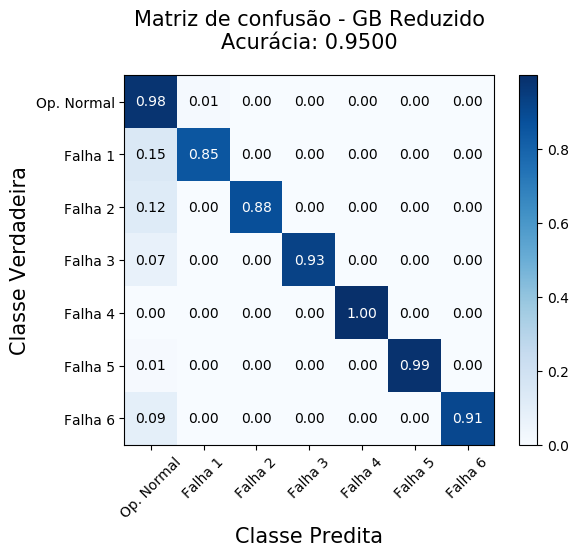

In [14]:
# Matriz de confusão e relatório de classificação
class_report = classification_report(test_output, predictions2)
print('Relatório de classificação:\n', class_report)
conf_mat = confusion_matrix(
    test_output, predictions2, labels=[0, 1, 2, 3, 4, 5, 6])
print('Matriz de confusão:\n', conf_mat)

# Gráfico matriz de confusão
plt.rcParams.update(plt.rcParamsDefault)
LABELS = ["Op. Normal", "Falha 1", "Falha 2",
          "Falha 3", "Falha 4", "Falha 5", "Falha 6"]
acc = accuracy_score(test_output, predictions2)
plot_confusion_matrix(conf_mat=conf_mat, colorbar=True, show_absolute=False,
show_normed=True, class_names=LABELS, cmap=plt.cm.Blues)

plt.title("Matriz de confusão - GB Reduzido\nAcurácia: %1.4f" % acc, fontsize=15)
plt.ylabel('Classe Verdadeira', fontsize=15)
plt.xlabel('Classe Predita', fontsize=15)
plt.savefig('GB_confmat_reduced.png')
plt.show()
plt.close()

Variável: SW5F(t)              Importância: 0.1808
Variável: ACG1P(t)             Importância: 0.1747
Variável: ACG1P(t-1)           Importância: 0.1262
Variável: SW1F(t)              Importância: 0.1058
Variável: AMG1P(t-1)           Importância: 0.0867
Variável: SW1F(t-1)            Importância: 0.0783
Variável: SW8T(t)              Importância: 0.0769
Variável: C2SL(t)              Importância: 0.07
Variável: C2SL(t-1)            Importância: 0.0693
Variável: SW8T(t-1)            Importância: 0.0313


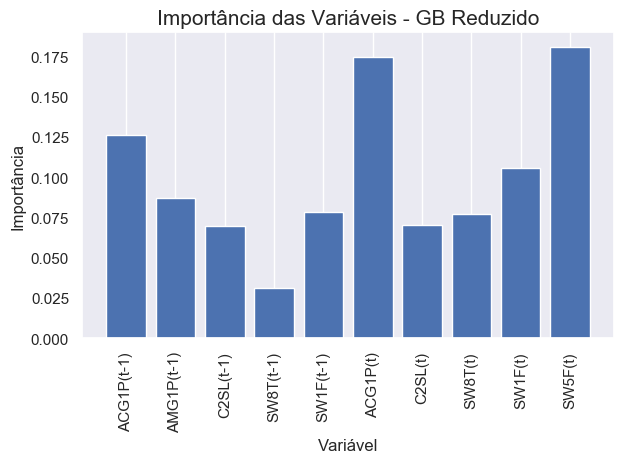

In [15]:
# Importancia das variáveis
importances2 = list(m3.feature_importances_)
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(header_red, importances2)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)
[print('Variável: {:20} Importância: {}'.format(*pair)) for pair in feature_importances]

# Gráfico importância
sns.set(font_scale=1)
x_values = list(range(len(importances2)))
plt.figure()
plt.grid(axis='y')
plt.bar(x_values, importances2, orientation='vertical')
plt.xticks(x_values, header_red, rotation='vertical')
plt.ylabel('Importância')
plt.xlabel('Variável')
plt.title('Importância das Variáveis - GB Reduzido', fontsize=15)
plt.tight_layout()
plt.savefig('GB_importance_reduced.png')
plt.show()
plt.close()

In [16]:
'''# Finaliza a contagem do tempo
elapsed = time.time() - t
print('Computing time:', elapsed)

# Fecha o arquivo
f.close()'''

"# Finaliza a contagem do tempo\nelapsed = time.time() - t\nprint('Computing time:', elapsed)\n\n# Fecha o arquivo\nf.close()"